In [28]:
import sys
sys.path.append('data_preprocessing')
import summary
import outliers
import normalize
import learning_helpers

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

# Get Data

In [2]:
train_data = pd.read_csv('../data/input/ames_train.csv')
test_data = pd.read_csv('../data/input/ames_test.csv')

geo_train_data = pd.read_csv('../data/input/ames_geodemo_train.csv')
geo_test_data = pd.read_csv('../data/input/ames_geodemo_test.csv')

# Normalize and remove outliers

In [3]:
train_data = normalize.fill_in_missing_values(train_data)
train_data = outliers.remove_outliers(train_data)
train_data = normalize.normalize(train_data)

test_data = normalize.fill_in_missing_values(test_data)
test_data = outliers.remove_outliers(test_data)
test_data = normalize.normalize(test_data)

geo_train_data = normalize.fill_in_missing_values(geo_train_data)
geo_train_data = outliers.remove_outliers(geo_train_data)
geo_train_data = normalize.normalize(geo_train_data)

geo_test_data = normalize.fill_in_missing_values(geo_test_data)
geo_test_data = outliers.remove_outliers(geo_test_data)
geo_test_data = normalize.normalize(geo_test_data)

# Add extra set for validation to get test, training, validation sets

In [4]:
X_train, X_val, y_train, y_val = train_test_split(train_data.loc[:, train_data.columns != 'log_SalePrice'], 
                                                  train_data['log_SalePrice'],
                                                  test_size=0.2, random_state=42)
X_test = train_data.drop('log_SalePrice', 1)
y_test = train_data['log_SalePrice']


# Split geodemo training set into train and validation set
X_geo_train, X_geo_val, y_geo_train, y_geo_val = train_test_split(geo_train_data.loc[:, geo_train_data.columns != 'log_SalePrice'], 
                                                                  geo_train_data['log_SalePrice'],
                                                                  test_size=0.2, random_state=42)
X_geo_test = geo_train_data.drop('log_SalePrice', 1)
y_geo_test = geo_train_data['log_SalePrice']

# Not all features may be in test and train at this point due to one hot encoding, 
# so check columns in one and not the other and remove

In [5]:
train_cols = list(X_train)
test_cols = list(X_test)
val_cols = list(X_val)
for col in train_cols:
    if (col not in  test_cols or col not in val_cols):
        X_train = X_train.drop(col, 1)
        
for col in test_cols:
    if (col not in  train_cols or col not in val_cols):
        X_test = X_test.drop(col, 1)

for col in val_cols:
    if(col not in test_cols or col not in train_cols):
        X_val = X_val.drop(col, 1)
        
        
geo_train_cols = list(X_geo_train)
geo_test_cols = list(X_geo_test)
geo_val_cols = list(X_geo_val)
for col in geo_train_cols:
    if (col not in  geo_test_cols or col not in geo_val_cols):
        X_geo_train = X_geo_train.drop(col, 1)
        
for col in geo_test_cols:
    if (col not in  geo_train_cols or col not in geo_val_cols):
        X_geo_test = X_geo_test.drop(col, 1)
        
for col in geo_val_cols:
    if(col not in geo_test_cols or col not in geo_train_cols):
        X_geo_val = X_geo_val.drop(col, 1)


# Actually do learning

## Linear Regression

In [8]:
lr = linear_model.LinearRegression()
lr, features_lr, r2 = learning_helpers.greedy_feature_selection(lr, X_train, y_train, X_val, y_val, 0.00001)
print('r2 on validation: {0}'.format(r2))

y_pred = lr.predict(X_test[features_lr])
print('r2 on test: {0}'.format(r2_score(y_test, y_pred)))

r2: 0.9431087890717987
r2 on test: 0.9322946640186407


In [10]:
lr_geo = linear_model.LinearRegression()
lr_geo, features_lr_geo, r2 = learning_helpers.greedy_feature_selection(lr, X_geo_train, y_geo_train, X_geo_val, y_geo_val, 0.00001)
print('r2 on validation: {0}'.format(r2))

y_pred = lr_geo.predict(X_geo_test[features_lr_geo])
print('r2 on test: {0}'.format(r2_score(y_geo_test, y_pred)))

r2 on validation: 0.9456753036178549
r2 on test: 0.9332493417065817


## Ridge

In [11]:
ridge_clf = linear_model.Ridge(alpha=1.0)
ridg_clf, features_ridge, r2 = learning_helpers.greedy_feature_selection(ridge_clf, X_train, y_train, X_val, y_val, 0.00001)
print('r2: {0}'.format(r2))

y_pred = ridge_clf.predict(X_test[features_ridge])
print('r2 on test: {0}'.format(r2_score(y_test, y_pred)))

r2: 0.9443376481621151
r2 on test: 0.9337470143419374


In [21]:
ridge_clf_geo = linear_model.Ridge(alpha=1.0)
ridg_clf_geo, features_ridge_geo, r2 = learning_helpers.greedy_feature_selection(ridge_clf_geo, X_geo_train, y_geo_train, X_geo_val, y_geo_val, 0.00001)
print('r2: {0}'.format(r2))

y_pred = ridge_clf_geo.predict(X_geo_test[features_ridge_geo])
print('r2 on test: {0}'.format(r2_score(y_geo_test, y_pred)))

r2: 0.9462453256385719
r2 on test: 0.9354890135737005


## Lasso

#todo: actually run this and see values.  Takes a really long time...

In [18]:
lasso = linear_model.LassoCV(alphas = [1, 0.1, 0.001, 0.0005],max_iter=100000)
lasso, features_lasso, r2 = learning_helpers.greedy_feature_selection(lasso, X_train, y_train, X_val, y_val, 0.00001)
print('r2 on validation: {0}'.format(r2))

y_pred = lasso.predict(X_test[features_lasso])
print('r2 on test: {0}'.format(r2_score(y_test, y_pred)))

r2 on validation: 0.8998700992861939
r2 on test: 0.8942947062977008


In [19]:
lasso_geo = linear_model.LassoCV(alphas = [1, 0.1, 0.001, 0.0005],max_iter=100000)
lasso_geo, features_lasso_geo, r2 = learning_helpers.greedy_feature_selection(lasso_geo, X_geo_train, y_geo_train, X_geo_val, y_geo_val, 0.00001)
print('r2 on validation: {0}'.format(r2))

y_pred = lasso_geo.predict(X_test[features_lasso_geo])
print('r2 on test: {0}'.format(r2_score(y_test, y_pred)))

r2 on validation: 0.8998700992861939
r2 on test: 0.8942947062977008


## Now plot 'Best'  In this case ridge on the geo data set just squeaked out a victory, so plot it's trophy

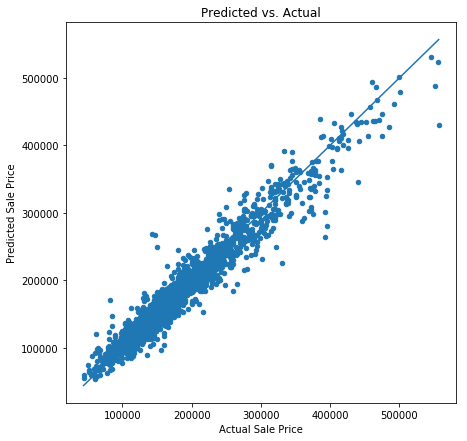

Final r2 score: 0.9433757223523724
Median margin of error: 0.05099098917781654


In [34]:
y_pred = ridge_clf_geo.predict(X_geo_test[features_ridge_geo])
y_test_norm = np.exp(y_test)
y_pred_norm = np.exp(y_pred)
summary.pred_vs_actual_plot(y_pred_norm, y_test_norm)
print('Final r2 score: {0}'.format(r2_score(y_test_norm, y_pred_norm)))
median_margin_of_error = np.median(np.abs((y_pred_norm - y_test_norm) / y_test_norm))
print('Median margin of error: {0}'.format(median_margin_of_error))